#**Analiza i porównanie podstawowych kursów walutowych z uwzględnieniem czasu COVID (03.2020 - 02.2022r.)**

## **Wstęp**


Z wykorzystaniem języka Python będzie przeprowadzona analiza następujących kursów walut: 

*   dolar amerykański - USD
*   dolar australijski - AUD
*   euro - EUR
*   funt - GBP
*   frank szwajcarski - CHF
*   hrywna - UAH
*   korona norweska - NOK

Celem analizy jest przebadanie poziomów kursów, podstawowych statystyk oraz dynamiki zmian walut w czasie pandemii COVID (pod uwagę jest brany okres marzec 2020 - luty 2022 roku). Analizie będą poddane dane notowań kursów walut zaczerpnięte ze strony Narodowego Banku Polskiego (https://nbp.pl/statystyka-i-sprawozdawczosc/kursy/archiwum-tabela-a-csv-xls/). Dane to dzienne, średnie notowania ogłaszane każdego dnia roboczego. Pliki są zapisywane w formacie .csv. Do analizy wykorzystano pliki, gdzie w każdym z nich są zawarte notowania z danego roku kalendarzowego.



### **Import bibliotek**

Do przeprowadzenia analizy danych wykorzystano poniższe biblioteki:

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import datetime
from datetime import date

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

### **Ładowanie plików**
Źródło plików www.nbp.pl (archiwum tabel A, pliki w formacie .csv) w latach 2010-maj 2023.


Pliki w poszczególnych latach 2010-maj 2023 mają format daty dd.mm.rrrr.
Pliki do Colab są ładowane pojedynczo, ponieważ poszczególne lata zostały opublikowane na stronie Narodowego Banku w archiwum w poszczególnych plikach .csv. Wszystkie pliki źródłowe zostały następnie załadowane do GitHub, skąd są zaciągane do Colab.

#### **Pliki w podziale na lata - 2010 - maj 2023.**

---



In [6]:
!wget https://raw.githubusercontent.com/mazinka/analiza-242023/main/2010.csv

--2023-06-04 04:53:33--  https://raw.githubusercontent.com/mazinka/analiza-242023/main/2010.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68715 (67K) [text/plain]
Saving to: ‘2010.csv’

2010.csv            100%[===================>]  67.10K  --.-KB/s    in 0.002s  

2023-06-04 04:53:33 (39.6 MB/s) - ‘2010.csv’ saved [68715/68715]



In [7]:
first_parser = lambda x : pd.datetime.strptime(x,'%d.%m.%Y')
waluty2010 = ["KURS", "1EUR", "1USD",'1AUD', '1CHF', '1UAH', '1NOK', '1GBP']
k2010_df = pd.read_csv('2010.csv', encoding = "ISO-8859-1", sep =";", decimal=",", parse_dates = ["KURS"], date_parser = first_parser, usecols=waluty2010)
k2010_df.head()

<ipython-input-7-25a99d72b5de>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  first_parser = lambda x : pd.datetime.strptime(x,'%d.%m.%Y')


,KURS,1USD,1AUD,1EUR,1CHF,1GBP,1UAH,1NOK
0,2010-01-04,2.8465,2.5738,4.0924,2.7510,4.6070,0.3548,0.4951
1,2010-01-05,2.8264,2.5874,4.0794,2.7483,4.5377,0.3537,0.4962
2,2010-01-06,2.8493,2.6039,4.0950,2.7575,4.5629,0.3580,0.4993
3,2010-01-07,2.8631,2.6315,4.1109,2.7744,4.5644,0.3594,0.5024
4,2010-01-08,2.8683,2.6283,4.1084,2.7726,4.5976,0.3592,0.5024


In [8]:
!wget https://raw.githubusercontent.com/mazinka/analiza-242023/main/2011.csv

--2023-06-04 04:53:33--  https://raw.githubusercontent.com/mazinka/analiza-242023/main/2011.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68792 (67K) [text/plain]
Saving to: ‘2011.csv’

2011.csv            100%[===================>]  67.18K  --.-KB/s    in 0.003s  

2023-06-04 04:53:33 (20.7 MB/s) - ‘2011.csv’ saved [68792/68792]



In [9]:
waluty2011 = ["KURS", "1EUR", "1USD",'1AUD', '1CHF', '1UAH', '1NOK', '1GBP']
k2011_df = pd.read_csv('2011.csv', encoding = "ISO-8859-1", sep =";", decimal=",", parse_dates = ["KURS"], date_parser = first_parser, usecols=waluty2011)
k2011_df.head()

<ipython-input-7-25a99d72b5de>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  first_parser = lambda x : pd.datetime.strptime(x,'%d.%m.%Y')


,KURS,1USD,1AUD,1EUR,1CHF,1GBP,1UAH,1NOK
0,2011-01-03,2.9822,3.0406,3.9622,3.1790,4.6075,0.3718,0.5088
1,2011-01-04,2.9415,2.9700,3.9433,3.1235,4.5975,0.3701,0.5037
2,2011-01-05,2.9476,2.9541,3.9095,3.0985,4.5945,0.3700,0.5003
3,2011-01-07,2.9818,2.9575,3.8730,3.0948,4.6082,0.3707,0.5007
4,2011-01-10,3.0268,2.9972,3.9082,3.1348,4.6934,0.3801,0.5066


In [10]:
!wget https://raw.githubusercontent.com/mazinka/analiza-242023/main/2012.csv

--2023-06-04 04:53:34--  https://raw.githubusercontent.com/mazinka/analiza-242023/main/2012.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72145 (70K) [text/plain]
Saving to: ‘2012.csv’

2012.csv            100%[===================>]  70.45K  --.-KB/s    in 0.002s  

2023-06-04 04:53:34 (28.4 MB/s) - ‘2012.csv’ saved [72145/72145]



In [11]:
waluty2012 = ["KURS", "1EUR", "1USD",'1AUD', '1CHF', '1UAH', '1NOK', '1GBP']
k2012_df = pd.read_csv('2012.csv', encoding = "ISO-8859-1", sep =";", decimal=",", parse_dates = ["KURS"], date_parser = first_parser, usecols=waluty2012)
k2012_df.head()

<ipython-input-7-25a99d72b5de>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  first_parser = lambda x : pd.datetime.strptime(x,'%d.%m.%Y')


,KURS,1USD,1AUD,1EUR,1CHF,1GBP,1UAH,1NOK
0,2012-01-02,3.4454,3.5229,4.4640,3.6668,5.3480,0.4300,0.5759
1,2012-01-03,3.4277,3.5345,4.4597,3.6622,5.3394,0.4296,0.5765
2,2012-01-04,3.4320,3.5528,4.4753,3.6714,5.3712,0.4262,0.5805
3,2012-01-05,3.5081,3.6020,4.5135,3.7037,5.4616,0.4361,0.5874
4,2012-01-09,3.5150,3.5949,4.4902,3.6940,5.4269,0.4360,0.5854


In [12]:
!wget https://raw.githubusercontent.com/mazinka/analiza-242023/main/2013.csv

--2023-06-04 04:53:34--  https://raw.githubusercontent.com/mazinka/analiza-242023/main/2013.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71854 (70K) [text/plain]
Saving to: ‘2013.csv’

2013.csv            100%[===================>]  70.17K  --.-KB/s    in 0.002s  

2023-06-04 04:53:34 (41.2 MB/s) - ‘2013.csv’ saved [71854/71854]



In [13]:
waluty2013 = ["KURS", "1EUR", "1USD",'1AUD', '1CHF', '1UAH', '1NOK', '1GBP']
k2013_df = pd.read_csv('2013.csv', encoding = "ISO-8859-1", sep =";",decimal=",", parse_dates = ["KURS"], date_parser = first_parser, usecols=waluty2013)
k2013_df.head()

<ipython-input-7-25a99d72b5de>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  first_parser = lambda x : pd.datetime.strptime(x,'%d.%m.%Y')


,KURS,1USD,1AUD,1EUR,1CHF,1GBP,1UAH,1NOK
0,2013-01-02,3.0660,3.2141,4.0671,3.3647,5.0026,0.3805,0.5552
1,2013-01-03,3.1005,3.2581,4.0770,3.3717,5.0296,0.3870,0.5580
2,2013-01-04,3.1700,3.3038,4.1248,3.4106,5.0873,0.3942,0.5663
3,2013-01-07,3.1618,3.3180,4.1218,3.4094,5.0767,0.3941,0.5636
4,2013-01-08,3.1457,3.3010,4.1263,3.4123,5.0605,0.3901,0.5631


In [14]:
!wget https://raw.githubusercontent.com/mazinka/analiza-242023/main/2014.csv

--2023-06-04 04:53:34--  https://raw.githubusercontent.com/mazinka/analiza-242023/main/2014.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70411 (69K) [text/plain]
Saving to: ‘2014.csv’

2014.csv            100%[===================>]  68.76K  --.-KB/s    in 0.001s  

2023-06-04 04:53:34 (49.1 MB/s) - ‘2014.csv’ saved [70411/70411]



In [15]:
waluty2014 = ["KURS", "1EUR", "1USD",'1AUD', '1CHF', '1UAH', '1NOK', '1GBP']
k2014_df = pd.read_csv('2014.csv', encoding = "ISO-8859-1", sep =";", decimal=",", parse_dates = ["KURS"], date_parser = first_parser, usecols=waluty2014) #, index_col="KURS"
k2014_df.head()

<ipython-input-7-25a99d72b5de>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  first_parser = lambda x : pd.datetime.strptime(x,'%d.%m.%Y')


,KURS,1USD,1AUD,1EUR,1CHF,1GBP,1UAH,1NOK
0,2014-01-02,3.0315,2.6959,4.1631,3.3816,5.0167,0.3720,0.4951
1,2014-01-03,3.0517,2.7446,4.1645,3.3884,5.0214,0.3721,0.4962
2,2014-01-07,3.0688,2.7374,4.1798,3.3817,5.0308,0.3735,0.4980
3,2014-01-08,3.0717,2.7403,4.1789,3.3765,5.0427,0.3729,0.4955
4,2014-01-09,3.0695,2.7248,4.1776,3.3787,5.0521,0.3736,0.4962


In [16]:
!wget https://raw.githubusercontent.com/mazinka/analiza-242023/main/2015.csv

--2023-06-04 04:53:34--  https://raw.githubusercontent.com/mazinka/analiza-242023/main/2015.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75678 (74K) [text/plain]
Saving to: ‘2015.csv’

2015.csv            100%[===================>]  73.90K  --.-KB/s    in 0.002s  

2023-06-04 04:53:34 (44.8 MB/s) - ‘2015.csv’ saved [75678/75678]



In [17]:
waluty2015 = ["KURS", "1EUR", "1USD",'1AUD', '1CHF', '1UAH', '1NOK', '1GBP']
k2015_df = pd.read_csv('2015.csv', encoding = "ISO-8859-1", sep =";", decimal=",", parse_dates = ["KURS"], date_parser = first_parser, usecols=waluty2015) #, index_col="KURS"
k2015_df.head()

<ipython-input-7-25a99d72b5de>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  first_parser = lambda x : pd.datetime.strptime(x,'%d.%m.%Y')


,KURS,1USD,1AUD,1EUR,1CHF,1GBP,1UAH,1NOK
0,2015-01-02,3.5725,2.9093,4.3078,3.5833,5.5296,0.2287,0.4761
1,2015-01-05,3.5975,2.9094,4.3008,3.5792,5.5064,0.2303,0.4714
2,2015-01-07,3.6375,2.9327,4.3115,3.5898,5.4983,0.2326,0.4639
3,2015-01-08,3.6482,2.9595,4.2985,3.5792,5.4919,0.2331,0.4759
4,2015-01-09,3.6252,2.9438,4.2837,3.5663,5.4835,0.2320,0.4735


In [18]:
!wget https://raw.githubusercontent.com/mazinka/analiza-242023/main/2016.csv

--2023-06-04 04:53:34--  https://raw.githubusercontent.com/mazinka/analiza-242023/main/2016.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74486 (73K) [text/plain]
Saving to: ‘2016.csv’

2016.csv            100%[===================>]  72.74K  --.-KB/s    in 0.002s  

2023-06-04 04:53:34 (43.6 MB/s) - ‘2016.csv’ saved [74486/74486]



In [19]:
waluty2016 = ["KURS", "1EUR", "1USD",'1AUD', '1CHF', '1UAH', '1NOK', '1GBP']
k2016_df = pd.read_csv('2016.csv', encoding = "ISO-8859-1", sep =";", decimal=",", parse_dates = ["KURS"], date_parser = first_parser, usecols=waluty2016)
k2016_df.head()

<ipython-input-7-25a99d72b5de>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  first_parser = lambda x : pd.datetime.strptime(x,'%d.%m.%Y')


,KURS,1USD,1AUD,1EUR,1CHF,1GBP,1UAH,1NOK
0,2016-01-04,3.9281,2.8349,4.2935,3.9526,5.8083,0.1635,0.4443
1,2016-01-05,4.0073,2.8763,4.3176,3.9792,5.8779,0.1666,0.4490
2,2016-01-07,4.0085,2.8167,4.3475,3.9979,5.8430,0.1663,0.4485
3,2016-01-08,3.9963,2.8070,4.3457,3.9922,5.8449,0.1662,0.4502
4,2016-01-11,4.0085,2.8101,4.3635,4.0159,5.8402,0.1709,0.4514


In [20]:
!wget https://raw.githubusercontent.com/mazinka/analiza-242023/main/2017.csv

--2023-06-04 04:53:34--  https://raw.githubusercontent.com/mazinka/analiza-242023/main/2017.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74424 (73K) [text/plain]
Saving to: ‘2017.csv’

2017.csv            100%[===================>]  72.68K  --.-KB/s    in 0.004s  

2023-06-04 04:53:35 (18.5 MB/s) - ‘2017.csv’ saved [74424/74424]



In [21]:
waluty2017 = ["KURS", "1EUR", "1USD",'1AUD', '1CHF', '1UAH', '1NOK','1GBP']
k2017_df = pd.read_csv('2017.csv', encoding = "ISO-8859-1", sep =";", decimal=",", parse_dates = ["KURS"], date_parser = first_parser, usecols=waluty2017)
k2017_df.head()

<ipython-input-7-25a99d72b5de>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  first_parser = lambda x : pd.datetime.strptime(x,'%d.%m.%Y')


,KURS,1USD,1AUD,1EUR,1CHF,1GBP,1UAH,1NOK
0,2017-01-02,4.2106,3.0187,4.4157,4.1209,5.1925,0.1554,0.4876
1,2017-01-03,4.2271,3.0477,4.4002,4.1137,5.1975,0.1561,0.4880
2,2017-01-04,4.2037,3.0539,4.3877,4.0978,5.1596,0.1571,0.4871
3,2017-01-05,4.1667,3.0375,4.3766,4.0876,5.1266,0.1586,0.4858
4,2017-01-09,4.1592,3.0423,4.3783,4.0863,5.0534,0.1542,0.4861


In [22]:
!wget https://raw.githubusercontent.com/mazinka/analiza-242023/main/2018.csv

--2023-06-04 04:53:35--  https://raw.githubusercontent.com/mazinka/analiza-242023/main/2018.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74723 (73K) [text/plain]
Saving to: ‘2018.csv’

2018.csv            100%[===================>]  72.97K  --.-KB/s    in 0.001s  

2023-06-04 04:53:35 (53.6 MB/s) - ‘2018.csv’ saved [74723/74723]



In [23]:
waluty2018 = ["KURS", "1EUR", "1USD",'1AUD', '1CHF', '1UAH', '1NOK','1GBP']
k2018_df = pd.read_csv('2018.csv', encoding = "ISO-8859-1", sep =";", decimal=",", parse_dates = ["KURS"], date_parser = first_parser, usecols=waluty2018)
k2018_df.head()

<ipython-input-7-25a99d72b5de>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  first_parser = lambda x : pd.datetime.strptime(x,'%d.%m.%Y')


,KURS,1USD,1AUD,1EUR,1CHF,1GBP,1UAH,1NOK
0,2018-01-02,3.4546,2.7069,4.1701,3.5567,4.6805,0.1227,0.4259
1,2018-01-03,3.4616,2.7121,4.1673,3.5592,4.7030,0.1242,0.4271
2,2018-01-04,3.4472,2.7034,4.1515,3.5308,4.6691,0.1229,0.4263
3,2018-01-05,3.4488,2.7062,4.1544,3.5298,4.6663,0.1223,0.4262
4,2018-01-08,3.4735,2.7220,4.1647,3.5502,4.6990,0.1231,0.4308


In [24]:
!wget https://raw.githubusercontent.com/mazinka/analiza-242023/main/2019.csv

--2023-06-04 04:53:35--  https://raw.githubusercontent.com/mazinka/analiza-242023/main/2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70639 (69K) [text/plain]
Saving to: ‘2019.csv’

2019.csv            100%[===================>]  68.98K  --.-KB/s    in 0.002s  

2023-06-04 04:53:35 (37.8 MB/s) - ‘2019.csv’ saved [70639/70639]



In [25]:
waluty2019 = ["KURS", "1EUR", "1USD",'1AUD', '1CHF', '1UAH', '1NOK','1GBP']
k2019_df = pd.read_csv('2019.csv', encoding = "ISO-8859-1", sep =";", decimal=",", parse_dates = ["KURS"], date_parser = first_parser, usecols=waluty2019)

k2019_df.head()

<ipython-input-7-25a99d72b5de>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  first_parser = lambda x : pd.datetime.strptime(x,'%d.%m.%Y')


,KURS,1USD,1AUD,1EUR,1CHF,1GBP,1UAH,1NOK
0,2019-01-02,3.7619,2.6393,4.3016,3.8242,4.7737,0.1358,0.4343
1,2019-01-03,3.7827,2.6338,4.3030,3.8343,4.7589,0.1375,0.4334
2,2019-01-04,3.7720,2.6585,4.3018,3.8213,4.7803,0.1357,0.4357
3,2019-01-07,3.7575,2.6784,4.2989,3.8245,4.7907,0.1351,0.4383
4,2019-01-08,3.7559,2.6778,4.3013,3.8307,4.7952,0.1339,0.4398


In [26]:
!wget https://raw.githubusercontent.com/mazinka/analiza-242023/main/2020.csv

--2023-06-04 04:53:35--  https://raw.githubusercontent.com/mazinka/analiza-242023/main/2020.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75741 (74K) [text/plain]
Saving to: ‘2020.csv’

2020.csv            100%[===================>]  73.97K  --.-KB/s    in 0.002s  

2023-06-04 04:53:35 (39.0 MB/s) - ‘2020.csv’ saved [75741/75741]



In [27]:
waluty2020 = ["KURS", "1EUR", "1USD",'1AUD', '1CHF', '1UAH', '1NOK','1GBP']
k2020_df = pd.read_csv('2020.csv', encoding = "ISO-8859-1", sep =";", decimal=",", parse_dates = ["KURS"], date_parser = first_parser, usecols=waluty2020)

k2020_df.head()

<ipython-input-7-25a99d72b5de>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  first_parser = lambda x : pd.datetime.strptime(x,'%d.%m.%Y')


,KURS,1USD,1AUD,1EUR,1CHF,1GBP,1UAH,1NOK
0,2020-01-02,3.8000,2.6589,4.2571,3.9191,5.0211,0.1603,0.4328
1,2020-01-03,3.8213,2.6507,4.2569,3.9254,4.9934,0.1615,0.4320
2,2020-01-07,3.7861,2.6097,4.2347,3.8992,4.9879,0.1595,0.4308
3,2020-01-08,3.8123,2.6199,4.2465,3.9245,5.0018,0.1601,0.4304
4,2020-01-09,3.8251,2.6233,4.2459,3.9265,4.9837,0.1584,0.4298


In [28]:
!wget https://raw.githubusercontent.com/mazinka/analiza-242023/main/2021.csv

--2023-06-04 04:53:35--  https://raw.githubusercontent.com/mazinka/analiza-242023/main/2021.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75061 (73K) [text/plain]
Saving to: ‘2021.csv’

2021.csv            100%[===================>]  73.30K  --.-KB/s    in 0.002s  

2023-06-04 04:53:35 (41.9 MB/s) - ‘2021.csv’ saved [75061/75061]



In [29]:
waluty2021 = ["KURS", "1EUR", "1USD",'1AUD', '1CHF', '1UAH', '1NOK','1GBP']
k2021_df = pd.read_csv('2021.csv', encoding = "ISO-8859-1", sep =";", decimal=",", parse_dates = ["KURS"], date_parser = first_parser, usecols=waluty2021)

k2021_df.head()

<ipython-input-7-25a99d72b5de>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  first_parser = lambda x : pd.datetime.strptime(x,'%d.%m.%Y')


,KURS,1USD,1AUD,1EUR,1CHF,1GBP,1UAH,1NOK
0,2021-01-04,3.6998,2.8611,4.5485,4.2055,5.0589,0.1300,0.4356
1,2021-01-05,3.7031,2.8569,4.5446,4.2078,5.0261,0.1304,0.4340
2,2021-01-07,3.6656,2.8420,4.4973,4.1505,4.9832,0.1297,0.4344
3,2021-01-08,3.6919,2.8727,4.5189,4.1674,5.0216,0.1306,0.4374
4,2021-01-11,3.7271,2.8741,4.5325,4.1896,5.0288,0.1321,0.4376


In [30]:
!wget https://raw.githubusercontent.com/mazinka/analiza-242023/main/2022.csv

--2023-06-04 04:53:35--  https://raw.githubusercontent.com/mazinka/analiza-242023/main/2022.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69961 (68K) [text/plain]
Saving to: ‘2022.csv’

2022.csv            100%[===================>]  68.32K  --.-KB/s    in 0.002s  

2023-06-04 04:53:36 (34.7 MB/s) - ‘2022.csv’ saved [69961/69961]



In [31]:
waluty2022 = ["KURS", "1EUR", "1USD",'1AUD', '1CHF', '1UAH', '1NOK','1GBP']
k2022_df = pd.read_csv('2022.csv', encoding = "ISO-8859-1", sep =";", decimal=",", parse_dates = ["KURS"], date_parser = first_parser, usecols=waluty2022)

k2022_df.head()

<ipython-input-7-25a99d72b5de>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  first_parser = lambda x : pd.datetime.strptime(x,'%d.%m.%Y')


,KURS,1USD,1AUD,1EUR,1CHF,1GBP,1UAH,1NOK
0,2022-01-03,4.0424,2.9329,4.5889,4.4326,5.4643,0.1482,0.4585
1,2022-01-04,4.0468,2.9185,4.5737,4.4090,5.4677,0.1482,0.4566
2,2022-01-05,4.0396,2.9274,4.5672,4.4106,5.4658,0.1471,0.4569
3,2022-01-07,4.0279,2.8823,4.5576,4.3720,5.4595,0.1465,0.4548
4,2022-01-10,4.0064,2.8802,4.5377,4.3500,5.4406,0.1457,0.4541


In [32]:
!wget https://raw.githubusercontent.com/mazinka/analiza-242023/main/052023.csv

--2023-06-04 04:53:36--  https://raw.githubusercontent.com/mazinka/analiza-242023/main/052023.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24703 (24K) [text/plain]
Saving to: ‘052023.csv’

052023.csv          100%[===================>]  24.12K  --.-KB/s    in 0s      

2023-06-04 04:53:36 (71.1 MB/s) - ‘052023.csv’ saved [24703/24703]



In [33]:
waluty2023 = ["KURS", "1EUR", "1USD",'1AUD', '1CHF', '1UAH', '1NOK','1GBP']
k2023_df = pd.read_csv('052023.csv', encoding = "ISO-8859-1", sep =";", decimal=",", parse_dates = ["KURS"], date_parser = first_parser, usecols=waluty2023)

k2023_df.head()

<ipython-input-7-25a99d72b5de>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  first_parser = lambda x : pd.datetime.strptime(x,'%d.%m.%Y')


,KURS,1USD,1AUD,1EUR,1CHF,1GBP,1UAH,1NOK
0,2023-01-02,4.3811,2.9767,4.6784,4.7379,5.2768,0.1258,0.4448
1,2023-01-03,4.4373,2.9825,4.6800,4.7342,5.2911,0.1258,0.4467
2,2023-01-04,4.3998,3.0231,4.6688,4.7454,5.3064,0.1258,0.4367
3,2023-01-05,4.3970,3.0008,4.6709,4.7437,5.2892,0.1258,0.4370
4,2023-01-09,4.4010,3.0479,4.6970,4.7606,5.3515,0.1258,0.4429


## **Łączenie tabel**

In [34]:
WalutyAll = pd.concat([k2010_df, k2011_df, k2012_df, k2013_df, k2014_df, k2015_df, k2016_df, k2017_df, k2018_df, k2019_df, k2020_df, k2021_df, k2022_df, k2023_df])
WalutyAll.reset_index(inplace=True)
WalutyAll.drop('index', axis=1, inplace=True)
WalutyAll

,KURS,1USD,1AUD,1EUR,1CHF,1GBP,1UAH,1NOK
0,2010-01-04,2.8465,2.5738,4.0924,2.7510,4.6070,0.3548,0.4951
1,2010-01-05,2.8264,2.5874,4.0794,2.7483,4.5377,0.3537,0.4962
2,2010-01-06,2.8493,2.6039,4.0950,2.7575,4.5629,0.3580,0.4993
3,2010-01-07,2.8631,2.6315,4.1109,2.7744,4.5644,0.3594,0.5024
4,2010-01-08,2.8683,2.6283,4.1084,2.7726,4.5976,0.3592,0.5024
...,...,...,...,...,...,...,...,...
3369,2023-05-08,4.1384,2.8078,4.5671,4.6572,5.2297,0.1120,0.3941
3370,2023-05-09,4.1609,2.8116,4.5683,4.6637,5.2458,0.1127,0.3945
3371,2023-05-10,4.1532,2.8045,4.5488,4.6633,5.2424,0.1125,0.3933
3372,2023-05-11,4.1414,2.7889,4.5259,4.6284,5.2109,0.1121,0.3927


#### **Dodawanie kolumn - lata, miesiące, dni**

Na potrzeby analiz danych w szeregu czasowym dodano do scalonej tabeli dodatkowe kolumny z różnymi zakresami czasowymi.

In [35]:
WalutyAll['ROK'] = WalutyAll['KURS'].apply(lambda x : x.year).astype("Int32")
WalutyAll['MIESIAC'] = WalutyAll['KURS'].apply(lambda x : x.month).astype("Int32")
WalutyAll['DZIEN'] = WalutyAll['KURS'].apply(lambda x : x.day).astype("Int32")
WalutyAll.head()

,KURS,1USD,1AUD,1EUR,1CHF,1GBP,1UAH,1NOK,ROK,MIESIAC,DZIEN
0,2010-01-04,2.8465,2.5738,4.0924,2.7510,4.6070,0.3548,0.4951,2010,1,4
1,2010-01-05,2.8264,2.5874,4.0794,2.7483,4.5377,0.3537,0.4962,2010,1,5
2,2010-01-06,2.8493,2.6039,4.0950,2.7575,4.5629,0.3580,0.4993,2010,1,6
3,2010-01-07,2.8631,2.6315,4.1109,2.7744,4.5644,0.3594,0.5024,2010,1,7
4,2010-01-08,2.8683,2.6283,4.1084,2.7726,4.5976,0.3592,0.5024,2010,1,8


## **Szeregi czasowe do analizy danych**

Na potrzeby analizy szereg czasowy podzielono na dwie części. Jedna jest przed okresem pandemii oraz druga w czasie pandemii. W ten sposób będzie można porównać dane kursów walutowych, przy założeniu że okres przed COVID jest bazowym, do którego będą przeprowadzone porównania.

In [36]:
start_covid = pd.to_datetime('2020-03-01')
koniec_covid = pd.to_datetime('2022-02-28')
przed_covid_df = WalutyAll.loc[WalutyAll['KURS'] < start_covid]
covid_df = WalutyAll.loc[(WalutyAll['KURS'] >= start_covid) & (WalutyAll['KURS'] <= koniec_covid)]

### **Okres przed COVID - 01.2010 - 02.2020**

Szereg czasowy od stycznia 2010 do lutego 2020r.

In [37]:
przed_covid_df.tail()

,KURS,1USD,1AUD,1EUR,1CHF,1GBP,1UAH,1NOK,ROK,MIESIAC,DZIEN
2558,2020-02-24,3.9772,2.6223,4.3017,4.0542,5.1293,0.1622,0.4239,2020,2,24
2559,2020-02-25,3.9624,2.6139,4.2996,4.0537,5.1489,0.1615,0.4239,2020,2,25
2560,2020-02-26,3.9573,2.6022,4.3093,4.0617,5.1246,0.1606,0.4214,2020,2,26
2561,2020-02-27,3.9413,2.5901,4.3100,4.0548,5.0855,0.1605,0.4204,2020,2,27
2562,2020-02-28,3.9255,2.5624,4.3355,4.0734,5.0657,0.1597,0.4162,2020,2,28


### **Czas pandemii COVID - 03.2020 - 02.2022**

Szereg czasowy od marca 2020 do lutego 2022r.

In [38]:
covid_df.head()

,KURS,1USD,1AUD,1EUR,1CHF,1GBP,1UAH,1NOK,ROK,MIESIAC,DZIEN
2563,2020-03-02,3.9023,2.5555,4.3237,4.0566,4.9815,0.1571,0.4173,2020,3,2
2564,2020-03-03,3.8804,2.5458,4.3173,4.0532,4.9584,0.1556,0.4181,2020,3,3
2565,2020-03-04,3.8536,2.5480,4.2993,4.0382,4.9264,0.1551,0.4165,2020,3,4
2566,2020-03-05,3.8479,2.5530,4.2994,4.0391,4.9716,0.1555,0.4161,2020,3,5
2567,2020-03-06,3.8231,2.5373,4.3178,4.0721,4.9658,0.1533,0.4126,2020,3,6


In [39]:
covid_df.tail()

,KURS,1USD,1AUD,1EUR,1CHF,1GBP,1UAH,1NOK,ROK,MIESIAC,DZIEN
3066,2022-02-22,4.0120,2.8919,4.5416,4.3676,5.4482,0.1387,0.4489,2022,2,22
3067,2022-02-23,3.9937,2.9013,4.5352,4.3401,5.4333,0.1365,0.4512,2022,2,23
3068,2022-02-24,4.1281,2.9617,4.6284,4.4808,5.5460,0.1381,0.4569,2022,2,24
3069,2022-02-25,4.1683,3.0009,4.6608,4.5001,5.5751,0.1381,0.4648,2022,2,25
3070,2022-02-28,4.1965,3.0216,4.6909,4.5483,5.6131,0.1381,0.4711,2022,2,28


## **Business case**

W tej części będzie przeprowadzona analiza danych. Ma to na prześledzenie jak kształtowały się poszczególne kursy walut w okresie pandemii i przed pandemią.

Analiza danych dotyczy podstawowych kursów walut w latach styczeń 2010-maj 2023. Przeanalizowano dane pod kątem podstawowych statystyk - średnia kursów walutowych, minimum, maksimum. Jednocześnie przebadano  korelację między zmiennymi. Przeprowadzona analiza ma odpowiedzieć na pytania:


1.   Jak kształtowały się podstawowe kursy walut w latach styczeń 2010- maj 2023? Główne statystki danych w podziale na miesiące oraz lata.
2.   Jak kształtowały się podstawowe kursy walut w czasie COVID (marzec 2020 - luty 2022)? Główne statystki danych w podziale na miesiące oraz lata.
3.   Które zmienne się ze sobą korelują (1, -1) - styczeń 2010- maj 2023r.? 
4.   Które zmienne w czasie pandemii są ze sobą skorelowane (1,-1) - marzec 2020- luty 2022r.? 





### **Statystyka danych**

W tej części zmienne kursów walutowych zostaną przeanalizowane. Wynikiem będzie porównanie danych w różnych okresach czasowych - przed i w trakcie pandemii.

#### **Podstawowe statystyki kursów walutowych**

Analiza dotyczy okresu styczeń 2010-maj 2023r. W szeregu czasowych zastosowano statystyki: średnia arytmetyczna, minimum, maksimum oraz kwantyle (mediana, górny, dolny).
Chcąc porównać dane, szeregi czasowe podzielono na dwa okresy - przed pandemią i w czasie COVID. Na tych dwóch zbiorach będzie przeprowadzona analiza.

In [40]:
statAll = WalutyAll.describe() [["1EUR", "1USD",'1AUD', '1CHF', '1UAH', '1NOK','1GBP']].round(4)
print(statAll)

            1EUR       1USD       1AUD       1CHF       1UAH       1NOK  \
count  3374.0000  3374.0000  3374.0000  3374.0000  3374.0000  3374.0000   
mean      4.2989     3.6142     2.9095     3.7907     0.2269     0.4776   
std       0.2092     0.4678     0.2188     0.4800     0.1107     0.0445   
min       3.8356     2.6458     2.4201     2.6503     0.1094     0.3540   
25%       4.1706     3.1872     2.7430     3.4472     0.1406     0.4437   
50%       4.2710     3.7144     2.8718     3.8128     0.1571     0.4682   
75%       4.4278     3.9022     3.0182     4.0855     0.3610     0.5061   
max       4.9647     5.0381     3.6206     5.1200     0.4420     0.5920   

            1GBP  
count  3374.0000  
mean      5.0980  
std       0.3488  
min       4.2503  
25%       4.8516  
50%       5.0428  
75%       5.3374  
max       6.0769  


##### **Okres przed COVID - 01.2010 - 02.2020**

In [41]:
statPrzedCov = przed_covid_df.describe() [["1EUR", "1USD",'1AUD', '1CHF', '1UAH', '1NOK','1GBP']].round(4)
print(statPrzedCov)

            1EUR       1USD       1AUD       1CHF       1UAH       1NOK  \
count  2563.0000  2563.0000  2563.0000  2563.0000  2563.0000  2563.0000   
mean      4.2054     3.4565     2.9085     3.5948     0.2550     0.4891   
std       0.1320     0.3857     0.2307     0.3459     0.1131     0.0431   
min       3.8356     2.6458     2.5175     2.6503     0.1094     0.4151   
25%       4.1450     3.1285     2.7301     3.4103     0.1478     0.4526   
50%       4.2159     3.4353     2.8635     3.6089     0.2151     0.4850   
75%       4.2954     3.7930     3.0049     3.8922     0.3788     0.5137   
max       4.5642     4.2493     3.6206     4.3223     0.4420     0.5920   

            1GBP  
count  2563.0000  
mean      5.0388  
std       0.3604  
min       4.2503  
25%       4.7973  
50%       4.9793  
75%       5.2103  
max       6.0769  


##### **Czas pandemii COVID - 03.2020 - 02.2022**

In [42]:
statCov = covid_df.describe() [["1EUR", "1USD",'1AUD', '1CHF', '1UAH', '1NOK','1GBP']].round(4)
print(statCov)                                                                                                       

           1EUR      1USD      1AUD      1CHF      1UAH      1NOK      1GBP
count  508.0000  508.0000  508.0000  508.0000  508.0000  508.0000  508.0000
mean     4.5289    3.8924    2.8142    4.2197    0.1420    0.4342    5.1872
std      0.0723    0.1541    0.1192    0.1071    0.0076    0.0213    0.2051
min      4.2993    3.6254    2.4201    4.0382    0.1292    0.3540    4.7983
25%      4.4804    3.7616    2.7375    4.1356    0.1353    0.4164    4.9812
50%      4.5366    3.8799    2.8420    4.1920    0.1406    0.4380    5.2110
75%      4.5796    3.9751    2.8967    4.2952    0.1487    0.4528    5.3681
max      4.7210    4.2654    3.0365    4.5483    0.1589    0.4758    5.6202


##### **Wyniki analizy statystyki podstawowe**

Różnica podstawowych statystyk kursów walutowych - czas pandemii - czas sprzed pandemii.

In [43]:
minusStat = statCov - statPrzedCov
minusStat.round(4)

,1EUR,1USD,1AUD,1CHF,1UAH,1NOK,1GBP
count,-2055.0000,-2055.0000,-2055.0000,-2055.0000,-2055.0000,-2055.0000,-2055.0000
mean,0.3235,0.4359,-0.0943,0.6249,-0.1130,-0.0549,0.1484
std,-0.0597,-0.2316,-0.1115,-0.2388,-0.1055,-0.0218,-0.1553
min,0.4637,0.9796,-0.0974,1.3879,0.0198,-0.0611,0.5480
25%,0.3354,0.6331,0.0074,0.7253,-0.0125,-0.0362,0.1839
50%,0.3207,0.4446,-0.0215,0.5831,-0.0745,-0.0470,0.2317
75%,0.2842,0.1821,-0.1082,0.4030,-0.2301,-0.0609,0.1578
max,0.1568,0.0161,-0.5841,0.2260,-0.2831,-0.1162,-0.4567


#### **Średnia kursów walutowych**

##### **Średnia roczna kursów walutowych**

###### **Okres 01.2010 - 05.2023**

In [44]:
annualAllmean_groupby = WalutyAll.groupby(['ROK'])[['1USD', '1AUD', '1EUR', '1CHF', '1GBP', '1UAH', '1NOK']].mean().round(4)
annualAllmean_groupby

,1USD,1AUD,1EUR,1CHF,1GBP,1UAH,1NOK
ROK,,,,,,,
2010,3.0179,2.7716,3.9939,2.8983,4.6587,0.3797,0.4988
2011,2.9636,3.0549,4.1196,3.3481,4.7470,0.3710,0.5284
2012,3.2581,3.3728,4.1852,3.4724,5.1605,0.4030,0.5597
2013,3.1615,3.0600,4.1976,3.4101,4.9426,0.3876,0.5385
2014,3.1537,2.8439,4.1845,3.4453,5.1919,0.2706,0.5011
2015,3.7730,2.8347,4.1843,3.9228,5.7675,0.1743,0.4680
2016,3.9435,2.9335,4.3637,4.0027,5.3405,0.1543,0.4697
2017,3.7782,2.8949,4.2583,3.8364,4.8595,0.1421,0.4570
2018,3.6117,2.6978,4.2617,3.6912,4.8168,0.1329,0.4439


###### **Okres przed COVID - 01.2010 - 02.2020**

In [45]:
annualPrzedCOVmean_groupby = przed_covid_df.groupby(['ROK'])[['1USD', '1AUD', '1EUR', '1CHF', '1GBP', '1UAH', '1NOK']].mean().round(4)
annualPrzedCOVmean_groupby.tail()

,1USD,1AUD,1EUR,1CHF,1GBP,1UAH,1NOK
ROK,,,,,,,
2016,3.9435,2.9335,4.3637,4.0027,5.3405,0.1543,0.4697
2017,3.7782,2.8949,4.2583,3.8364,4.8595,0.1421,0.4570
2018,3.6117,2.6978,4.2617,3.6912,4.8168,0.1329,0.4439
2019,3.8399,2.6690,4.2988,3.8644,4.8988,0.1491,0.4365
2020,3.8754,2.6207,4.2646,3.9825,5.0446,0.1588,0.4249


###### **Czas pandemii COVID - 03.2020 - 02.2022**

In [46]:
annualCOVmean_groupby = covid_df.groupby(['ROK'])[['1USD', '1AUD', '1EUR', '1CHF', '1GBP', '1UAH', '1NOK']].mean().round(4)
annualCOVmean_groupby.head()

,1USD,1AUD,1EUR,1CHF,1GBP,1UAH,1NOK
ROK,,,,,,,
2020,3.9021,2.6997,4.4795,4.1861,4.9883,0.1421,0.4125
2021,3.8647,2.9001,4.5670,4.2254,5.3144,0.1419,0.4493
2022,4.0170,2.8814,4.5513,4.3631,5.4434,0.1418,0.4536


##### **Średnia miesięczna kursów walutowych**

###### **Okres 01.2010 - 05.2023**

In [47]:
monthAllmean_groupby = WalutyAll.groupby(['ROK','MIESIAC'])[['1USD', '1AUD', '1EUR', '1CHF', '1GBP', '1UAH', '1NOK']].mean().round(4)
monthAllmean_groupby

1USD    1AUD    1EUR    1CHF    1GBP    1UAH    1NOK
ROK  MIESIAC                                                        
2010 1        2.8475  2.6031  4.0675  2.7545  4.6083  0.3537  0.4968
     2        2.9314  2.5995  4.0142  2.7355  4.5813  0.3645  0.4955
     3        2.8678  2.6156  3.8931  2.6885  4.3179  0.3603  0.4843
     4        2.8857  2.6732  3.8748  2.7024  4.4252  0.3643  0.4878
     5        3.2382  2.8104  4.0602  2.8604  4.7382  0.4088  0.5142
...              ...     ...     ...     ...     ...     ...     ...
2023 1        4.3556  3.0281  4.6988  4.7171  5.3282  0.1258  0.4392
     2        4.4268  3.0580  4.7435  4.7894  5.3540  0.1258  0.4333
     3        4.3837  2.9265  4.6911  4.7359  5.3201  0.1258  0.4160
     4        4.2301  2.8284  4.6394  4.7103  5.2654  0.1151  0.4028
     5        4.1570  2.7957  4.5649  4.6602  5.2283  0.1126  0.3918

[161 rows x 7 columns]

###### **Okres przed COVID - 01.2010 - 02.2020**

In [48]:
monthPrzedCOVmean_groupby = przed_covid_df.groupby(['ROK','MIESIAC'])[['1USD', '1AUD', '1EUR', '1CHF', '1GBP', '1UAH', '1NOK']].mean().round(4)
monthPrzedCOVmean_groupby.tail()

1USD    1AUD    1EUR    1CHF    1GBP    1UAH    1NOK
ROK  MIESIAC                                                        
2019 10       3.8949  2.6454  4.3032  3.9195  4.9157  0.1568  0.4255
     11       3.8804  2.6485  4.2881  3.9066  5.0011  0.1599  0.4241
     12       3.8442  2.6440  4.2724  3.9086  5.0423  0.1628  0.4253
2020 1        3.8319  2.6260  4.2514  3.9495  5.0052  0.1580  0.4277
     2        3.9212  2.6150  4.2786  4.0172  5.0859  0.1596  0.4219

###### **Czas pandemii COVID - 03.2020 - 02.2022**

In [49]:
monthCOVmean_groupby = covid_df.groupby(['ROK','MIESIAC'])[['1USD', '1AUD', '1EUR', '1CHF', '1GBP', '1UAH', '1NOK']].mean().round(4)
monthCOVmean_groupby

1USD    1AUD    1EUR    1CHF    1GBP    1UAH    1NOK
ROK  MIESIAC                                                        
2020 3        4.0136  2.4999  4.4395  4.1921  4.9654  0.1512  0.3939
     4        4.1817  2.6328  4.5432  4.3081  5.1892  0.1539  0.4008
     5        4.1599  2.7100  4.5300  4.2861  5.1105  0.1552  0.4114
     6        3.9453  2.7199  4.4413  4.1447  4.9401  0.1477  0.4141
     7        3.8862  2.7298  4.4507  4.1576  4.9177  0.1421  0.4175
     8        3.7200  2.6773  4.4017  4.0876  4.8875  0.1353  0.4157
     9        3.7929  2.7440  4.4730  4.1478  4.9194  0.1354  0.4154
     10       3.8607  2.7517  4.5427  4.2299  5.0119  0.1362  0.4158
     11       3.8016  2.7645  4.4997  4.1751  5.0190  0.1343  0.4180
     12       3.6807  2.7693  4.4786  4.1406  4.9422  0.1307  0.4224
2021 1        3.7286  2.8786  4.5357  4.2030  5.0851  0.1323  0.4377
     2        3.7176  2.8836  4.4976  4.1435  5.1539  0.1334  0.4376
     3        3.8639  2.9774  4.5985  4.1571  5.3555  0.1390  0.4532
     4        3.8158  2.9379  4.5660  4.1376  5.2802  0.1367  0.4548
     5        3.7262  2.8919  4.5280  4.1290  5.2506  0.1351  0.4486
     6        3.7396  2.8570  4.5034  4.1170  5.2428  0.1375  0.4439
     7        3.8602  2.8660  4.5642  4.2053  5.3290  0.1420  0.4397
     8        3.8819  2.8341  4.5689  4.2463  5.3564  0.1450  0.4383
     9        3.8797  2.8413  4.5679  4.2064  5.3308  0.1453  0.4482
     10       3.9600  2.9297  4.5938  4.2876  5.4196  0.1502  0.4675
     11       4.0794  2.9771  4.6515  4.4233  5.4881  0.1538  0.4664
     12       4.0845  2.9248  4.6163  4.4354  5.4375  0.1501  0.4554
2022 1        4.0202  2.8880  4.5521  4.3758  5.4527  0.1432  0.4549
     2        4.0139  2.8748  4.5505  4.3505  5.4342  0.1405  0.4523

#### **Minimum kursów walutowych**

##### **Okres 01.2010 - 05.2023**

In [50]:
monthAllmin_groupby = WalutyAll.groupby(['ROK','MIESIAC'])[['1USD', '1AUD', '1EUR', '1CHF', '1GBP', '1UAH', '1NOK']].min().round(4)
monthAllmin_groupby

1USD    1AUD    1EUR    1CHF    1GBP    1UAH    1NOK
ROK  MIESIAC                                                        
2010 1        2.7930  2.5738  4.0143  2.7213  4.5128  0.3423  0.4926
     2        2.8321  2.5175  3.9630  2.6944  4.4615  0.3509  0.4868
     3        2.8083  2.5798  3.8622  2.6503  4.2503  0.3515  0.4806
     4        2.8325  2.6125  3.8356  2.6780  4.3343  0.3579  0.4790
     5        2.9928  2.7385  3.9310  2.7442  4.5461  0.3732  0.5021
...              ...     ...     ...     ...     ...     ...     ...
2023 1        4.3242  2.9767  4.6688  4.6600  5.2768  0.1258  0.4327
     2        4.2803  2.9888  4.6920  4.7023  5.2571  0.1258  0.4265
     3        4.2934  2.8715  4.6750  4.6743  5.2648  0.1258  0.4117
     4        4.1541  2.7448  4.5887  4.6550  5.1805  0.1125  0.3881
     5        4.1384  2.7669  4.5259  4.6284  5.2109  0.1120  0.3883

[161 rows x 7 columns]

##### **Okres przed COVID - 01.2010 - 02.2020**

In [51]:
monthPrzedCOVmin_groupby = przed_covid_df.groupby(['ROK','MIESIAC'])[['1USD', '1AUD', '1EUR', '1CHF', '1GBP', '1UAH', '1NOK']].min().round(4)
monthPrzedCOVmin_groupby.tail()

1USD    1AUD    1EUR    1CHF    1GBP    1UAH    1NOK
ROK  MIESIAC                                                        
2019 10       3.8174  2.6255  4.2617  3.8681  4.7971  0.1529  0.4151
     11       3.8099  2.6341  4.2539  3.8567  4.9229  0.1536  0.4198
     12       3.7977  2.6171  4.2554  3.8850  4.9765  0.1602  0.4202
2020 1        3.7861  2.6086  4.2279  3.8992  4.9322  0.1558  0.4219
     2        3.8654  2.5624  4.2402  3.9680  5.0177  0.1551  0.4162

##### **Czas pandemii COVID - 03.2020 - 02.2022**

In [52]:
monthCOVmin_groupby = covid_df.groupby(['ROK','MIESIAC'])[['1USD', '1AUD', '1EUR', '1CHF', '1GBP', '1UAH', '1NOK']].min().round(4)
monthCOVmin_groupby

1USD    1AUD    1EUR    1CHF    1GBP    1UAH    1NOK
ROK  MIESIAC                                                        
2020 3        3.7899  2.4201  4.2993  4.0382  4.8161  0.1460  0.3540
     4        4.1519  2.5338  4.5175  4.2843  5.1434  0.1504  0.3926
     5        4.0031  2.6578  4.4264  4.1494  4.9213  0.1489  0.4000
     6        3.9058  2.6727  4.3859  4.0635  4.8851  0.1461  0.4059
     7        3.7166  2.6727  4.3987  4.0787  4.8326  0.1342  0.4102
     8        3.6732  2.6598  4.3864  4.0707  4.8537  0.1339  0.4097
     9        3.6707  2.7106  4.3946  4.0659  4.7983  0.1329  0.4063
     10       3.7913  2.7213  4.4737  4.1536  4.9089  0.1339  0.4089
     11       3.7364  2.7452  4.4679  4.1171  4.9602  0.1311  0.4130
     12       3.6254  2.7305  4.4276  4.1043  4.8418  0.1292  0.4148
2021 1        3.6656  2.8420  4.4973  4.1505  4.9832  0.1297  0.4320
     2        3.6940  2.8426  4.4773  4.0770  5.0937  0.1321  0.4331
     3        3.7509  2.9049  4.5231  4.0981  5.2367  0.1341  0.4344
     4        3.7657  2.9053  4.5330  4.1189  5.2235  0.1348  0.4481
     5        3.6549  2.8388  4.4805  4.0815  5.1850  0.1331  0.4391
     6        3.6545  2.8301  4.4541  4.0707  5.1821  0.1334  0.4398
     7        3.7979  2.8423  4.5036  4.1167  5.2574  0.1392  0.4343
     8        3.8315  2.7980  4.5374  4.1984  5.2859  0.1426  0.4324
     9        3.7998  2.8099  4.5067  4.1542  5.2452  0.1409  0.4376
     10       3.9212  2.8595  4.5472  4.2371  5.3382  0.1482  0.4550
     11       3.9622  2.9296  4.5942  4.3401  5.3604  0.1512  0.4556
     12       4.0600  2.8536  4.5889  4.4029  5.3854  0.1483  0.4444
2022 1        3.9463  2.8552  4.5201  4.3192  5.4123  0.1398  0.4480
     2        3.9218  2.8191  4.4879  4.2465  5.3225  0.1365  0.4440

#### **Maksimum kursów walutowych**

##### **Okres 01.2010 - 05.2023**

In [53]:
monthAllmax_groupby = WalutyAll.groupby(['ROK','MIESIAC'])[['1USD', '1AUD', '1EUR', '1CHF', '1GBP', '1UAH', '1NOK']].max().round(4)
monthAllmax_groupby

1USD    1AUD    1EUR    1CHF    1GBP    1UAH    1NOK
ROK  MIESIAC                                                        
2010 1        2.9083  2.6319  4.1109  2.7850  4.7080  0.3620  0.5024
     2        2.9915  2.6447  4.0921  2.7869  4.7009  0.3723  0.5009
     3        2.9163  2.6623  3.9403  2.7316  4.3725  0.3676  0.4887
     4        3.0038  2.7552  3.9514  2.7583  4.5576  0.3786  0.5025
     5        3.4190  2.9155  4.1770  2.9463  4.8773  0.4293  0.5270
...              ...     ...     ...     ...     ...     ...     ...
2023 1        4.4373  3.0799  4.7239  4.7606  5.3711  0.1258  0.4467
     2        4.4888  3.1041  4.7895  4.8582  5.4193  0.1258  0.4412
     3        4.4626  2.9967  4.7109  4.8054  5.3808  0.1258  0.4271
     4        4.3168  2.8918  4.6902  4.7570  5.3648  0.1258  0.4160
     5        4.1823  2.8116  4.5892  4.6792  5.2458  0.1132  0.3945

[161 rows x 7 columns]

##### **Okres przed COVID - 01.2010 - 02.2020**

In [54]:
monthPrzedCOVmax_groupby = przed_covid_df.groupby(['ROK','MIESIAC'])[['1USD', '1AUD', '1EUR', '1CHF', '1GBP', '1UAH', '1NOK']].max().round(4)
monthPrzedCOVmax_groupby.tail()

1USD    1AUD    1EUR    1CHF    1GBP    1UAH    1NOK
ROK  MIESIAC                                                        
2019 10       4.0152  2.6891  4.3788  4.0167  4.9709  0.1637  0.4396
     11       3.9288  2.6626  4.3236  3.9501  5.0775  0.1640  0.4276
     12       3.9047  2.6628  4.3008  3.9257  5.1292  0.1655  0.4320
2020 1        3.8999  2.6589  4.3010  4.0194  5.1160  0.1615  0.4328
     2        3.9772  2.6502  4.3355  4.0734  5.1489  0.1622  0.4259

##### **Czas pandemii COVID - 03.2020 - 02.2022**

In [55]:
monthCOVmax_groupby = covid_df.groupby(['ROK','MIESIAC'])[['1USD', '1AUD', '1EUR', '1CHF', '1GBP', '1UAH', '1NOK']].max().round(4)
monthCOVmax_groupby

1USD    1AUD    1EUR    1CHF    1GBP    1UAH    1NOK
ROK  MIESIAC                                                        
2020 3        4.2654  2.5555  4.6044  4.3563  5.1052  0.1571  0.4181
     4        4.2396  2.7307  4.5792  4.3403  5.2337  0.1559  0.4081
     5        4.2269  2.7441  4.5693  4.3445  5.2136  0.1589  0.4172
     6        3.9806  2.7428  4.4660  4.1919  5.0010  0.1493  0.4237
     7        3.9764  2.7581  4.4916  4.2121  4.9941  0.1480  0.4230
     8        3.7558  2.7169  4.4168  4.1078  4.9265  0.1364  0.4205
     9        3.9228  2.7887  4.5834  4.2500  5.0522  0.1387  0.4236
     10       3.9563  2.7937  4.6330  4.3329  5.1404  0.1391  0.4232
     11       3.9557  2.7836  4.6048  4.3124  5.1076  0.1384  0.4244
     12       3.7584  2.8950  4.6148  4.2641  5.1327  0.1326  0.4400
2021 1        3.7699  2.9013  4.5497  4.2291  5.1516  0.1338  0.4423
     2        3.7554  2.9560  4.5176  4.1710  5.2607  0.1353  0.4433
     3        3.9676  3.0242  4.6603  4.2164  5.4679  0.1427  0.4657
     4        3.9428  2.9800  4.6239  4.1644  5.4316  0.1417  0.4610
     5        3.8136  2.9511  4.5829  4.1809  5.3050  0.1375  0.4582
     6        3.8214  2.8825  4.5503  4.1601  5.3072  0.1405  0.4491
     7        3.9035  2.8981  4.5983  4.2540  5.3979  0.1450  0.4436
     8        3.9301  2.8786  4.5900  4.2818  5.4166  0.1473  0.4457
     9        3.9925  2.8765  4.6329  4.2789  5.4061  0.1500  0.4582
     10       3.9992  2.9998  4.6284  4.3496  5.4910  0.1519  0.4758
     11       4.1893  3.0365  4.7210  4.5089  5.6202  0.1572  0.4721
     12       4.1182  2.9654  4.6494  4.4652  5.4889  0.1527  0.4622
2022 1        4.1147  2.9329  4.5982  4.4326  5.5320  0.1482  0.4597
     2        4.1965  3.0216  4.6909  4.5483  5.6131  0.1436  0.4711

#### **Korelacja**

###### **Okres 01.2010 - 05.2023**

Korelacja między zmiennymi w okresie od stycznia 2010r. do maja 2023r.

In [56]:
KorelAll=WalutyAll[["1EUR", "1USD",'1AUD', '1CHF', '1UAH', '1NOK','1GBP']].corr().round(2)
KorelAll

,1EUR,1USD,1AUD,1CHF,1UAH,1NOK,1GBP
1EUR,1.00,0.84,0.13,0.91,-0.59,-0.42,0.51
1USD,0.84,1.00,-0.04,0.93,-0.78,-0.60,0.56
1AUD,0.13,-0.04,1.00,0.05,0.47,0.74,0.25
1CHF,0.91,0.93,0.05,1.00,-0.75,-0.55,0.59
1UAH,-0.59,-0.78,0.47,-0.75,1.00,0.87,-0.31
1NOK,-0.42,-0.60,0.74,-0.55,0.87,1.00,-0.06
1GBP,0.51,0.56,0.25,0.59,-0.31,-0.06,1.00


Istotne współczynniki skorelowania przedstwiono w tabeli poniżej. Korelacja powyżej 0.5 do 1 i poniżej -0.5 do -1.

In [57]:
KorelAll_high = KorelAll[((KorelAll > 0.5) & (KorelAll < 1)) | (KorelAll < -0.5) ].dropna(how='all', axis=1).round(2)
print(KorelAll_high)

      1EUR  1USD  1AUD  1CHF  1UAH  1NOK  1GBP
1EUR   NaN  0.84   NaN  0.91 -0.59   NaN  0.51
1USD  0.84   NaN   NaN  0.93 -0.78 -0.60  0.56
1AUD   NaN   NaN   NaN   NaN   NaN  0.74   NaN
1CHF  0.91  0.93   NaN   NaN -0.75 -0.55  0.59
1UAH -0.59 -0.78   NaN -0.75   NaN  0.87   NaN
1NOK   NaN -0.60  0.74 -0.55  0.87   NaN   NaN
1GBP  0.51  0.56   NaN  0.59   NaN   NaN   NaN


###### **Okres przed COVID - 01.2010 - 02.2020**

In [58]:
KorelPrzedCOV = przed_covid_df[["1EUR", "1USD",'1AUD', '1CHF', '1UAH', '1NOK','1GBP']].corr().round(2)
KorelPrzedCOV

,1EUR,1USD,1AUD,1CHF,1UAH,1NOK,1GBP
1EUR,1.00,0.73,0.07,0.77,-0.46,-0.19,0.42
1USD,0.73,1.00,-0.21,0.89,-0.79,-0.60,0.48
1AUD,0.07,-0.21,1.00,-0.07,0.58,0.84,0.17
1CHF,0.77,0.89,-0.07,1.00,-0.74,-0.46,0.55
1UAH,-0.46,-0.79,0.58,-0.74,1.00,0.88,-0.22
1NOK,-0.19,-0.60,0.84,-0.46,0.88,1.00,0.01
1GBP,0.42,0.48,0.17,0.55,-0.22,0.01,1.00


Istotne współczynniki skorelowania przedstwiono w tabeli poniżej. Korelacja powyżej 0.5 do 1 i poniżej -0.5 do -1.

In [59]:
KorelPrzedCOV_high = KorelPrzedCOV[((KorelPrzedCOV > 0.5) & (KorelPrzedCOV < 1)) | (KorelPrzedCOV < -0.5) ].dropna(how='all', axis=1).round(2)
print(KorelPrzedCOV_high)

      1EUR  1USD  1AUD  1CHF  1UAH  1NOK  1GBP
1EUR   NaN  0.73   NaN  0.77   NaN   NaN   NaN
1USD  0.73   NaN   NaN  0.89 -0.79 -0.60   NaN
1AUD   NaN   NaN   NaN   NaN  0.58  0.84   NaN
1CHF  0.77  0.89   NaN   NaN -0.74   NaN  0.55
1UAH   NaN -0.79  0.58 -0.74   NaN  0.88   NaN
1NOK   NaN -0.60  0.84   NaN  0.88   NaN   NaN
1GBP   NaN   NaN   NaN  0.55   NaN   NaN   NaN


###### **Czas pandemii COVID - 03.2020 - 02.2022**

In [60]:
KorelCOV = covid_df[["1EUR", "1USD",'1AUD', '1CHF', '1UAH', '1NOK','1GBP']].corr().round(2)
KorelCOV

,1EUR,1USD,1AUD,1CHF,1UAH,1NOK,1GBP
1EUR,1.00,0.50,0.66,0.73,0.34,0.61,0.80
1USD,0.50,1.00,-0.09,0.81,0.87,-0.03,0.41
1AUD,0.66,-0.09,1.00,0.28,-0.13,0.92,0.74
1CHF,0.73,0.81,0.28,1.00,0.61,0.32,0.64
1UAH,0.34,0.87,-0.13,0.61,1.00,0.01,0.37
1NOK,0.61,-0.03,0.92,0.32,0.01,1.00,0.82
1GBP,0.80,0.41,0.74,0.64,0.37,0.82,1.00


Istotne współczynniki skorelowania przedstwiono w tabeli poniżej. Korelacja powyżej 0.5 do 1 i poniżej -0.5 do -1.

In [61]:
KorelCOV_high = KorelCOV[((KorelCOV > 0.5) & (KorelCOV < 1)) | (KorelCOV < -0.5) ].dropna(how='all', axis=1).round(2)
print(KorelCOV_high)

      1EUR  1USD  1AUD  1CHF  1UAH  1NOK  1GBP
1EUR   NaN   NaN  0.66  0.73   NaN  0.61  0.80
1USD   NaN   NaN   NaN  0.81  0.87   NaN   NaN
1AUD  0.66   NaN   NaN   NaN   NaN  0.92  0.74
1CHF  0.73  0.81   NaN   NaN  0.61   NaN  0.64
1UAH   NaN  0.87   NaN  0.61   NaN   NaN   NaN
1NOK  0.61   NaN  0.92   NaN   NaN   NaN  0.82
1GBP  0.80   NaN  0.74  0.64   NaN  0.82   NaN


### **Analiza wizualna danych**

#### **Szeregi czasowe** - wykresy liniowe

###### **Relacja euro do dolara amerykańskiego**

Do wykresu stosunek EUR do USD należy utworzyć tabelę danych.

In [62]:
stosunek_EUR_USD = pd.DataFrame()
stosunek_EUR_USD["EUR/USD"] = WalutyAll['1EUR']/WalutyAll['1USD']
stosunek_EUR_USD["Data"] = WalutyAll["KURS"]
stosunek_EUR_USD.set_index("Data", inplace=True)
stosunek_EUR_USD

,EUR/USD
Data,
2010-01-04,1.437695
2010-01-05,1.443320
2010-01-06,1.437195
2010-01-07,1.435821
2010-01-08,1.432347
...,...
2023-05-08,1.103591
2023-05-09,1.097912
2023-05-10,1.095252


Sprawdzenie, czy w poszczególnych okresach są zawarte wszystkie obserwacje.

In [63]:
print(len(stosunek_EUR_USD))
print(len(stosunek_EUR_USD[:'2020-02']))
print(len(stosunek_EUR_USD['2020-03':]))

3374
2563
811


**Do celów analizy obliczono średnią arytmetyczną z relacji kursu walutowego EUR do USD.**

**Okres przed COVID - 01.2010 - 02.2020**

In [64]:
stosunek_EUR_USD[:'2020-02'].mean().round(2)

EUR/USD    1.23
dtype: float64

**Czas pandemii COVID - 03.2020 - 02.2022**

In [65]:
stosunek_EUR_USD['2020-03':'2022-02'].mean().round(2)

EUR/USD    1.16
dtype: float64

Do wykresu, w którym część danych w okresie COVID została odróżniona innym kolorem wprowadzono drugą linię do wykresu.

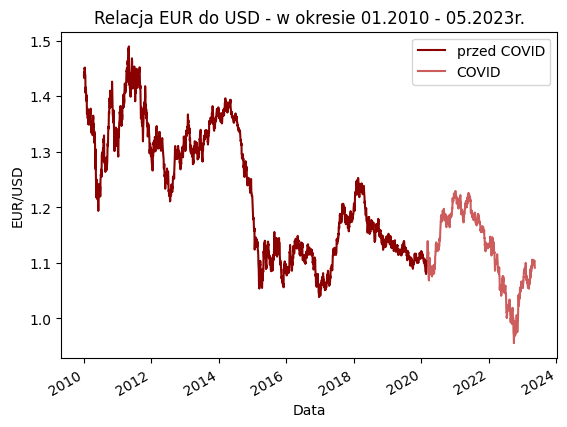

In [66]:
fig, ax = plt.subplots()
stosunek_EUR_USD[:'2020-02'].plot.line(ax=ax, color = "darkred")
stosunek_EUR_USD['2020-03':].plot.line(ax=ax, color = "indianred")
plt.title('Relacja EUR do USD - w okresie 01.2010 - 05.2023r.')
plt.xlabel('Data')
plt.ylabel('EUR/USD')
plt.legend(['przed COVID', 'COVID'])
plt.show()

###### **Wykres euro i dolara amerykańskiego**

In [67]:
WalutyAll.set_index('KURS', inplace=True)

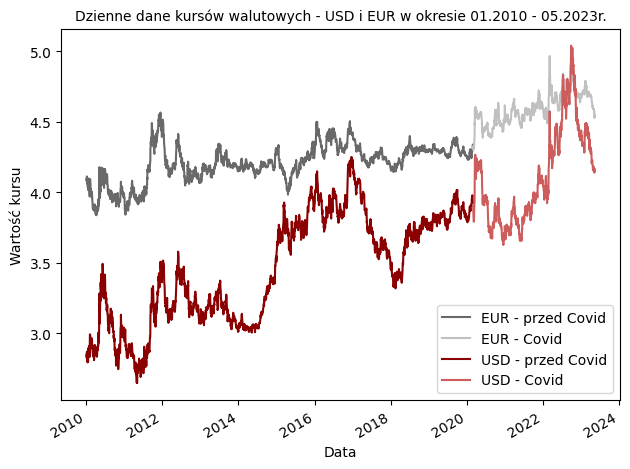

In [68]:
fig, ax = plt.subplots()
WalutyAll['1EUR'][:'2020-02'].plot.line(ax=ax, color = "dimgrey")
WalutyAll['1EUR']['2020-03':].plot.line(ax=ax, color = "silver")
WalutyAll['1USD'][:'2020-02'].plot.line(ax=ax, color = "darkred")
WalutyAll['1USD']['2020-03':].plot.line(ax=ax, color = "indianred")
plt.title('Dzienne dane kursów walutowych - USD i EUR w okresie 01.2010 - 05.2023r.', fontsize=10)
plt.xlabel('Data')
plt.ylabel('Wartość kursu')
plt.legend(['EUR - przed Covid','EUR - Covid','USD - przed Covid','USD - Covid'])
plt.tight_layout()
plt.show()

###### **Wykres euro i franka szwajcarskiego**

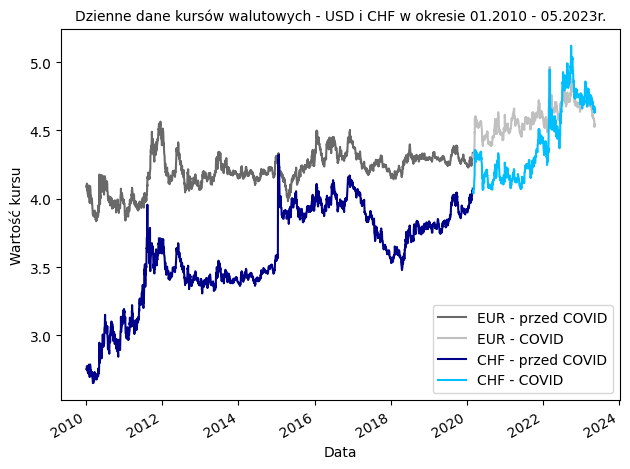

In [69]:
fig, ax = plt.subplots()
WalutyAll['1EUR'][:'2020-02'].plot.line(ax=ax, color = "dimgrey")
WalutyAll['1EUR']['2020-03':].plot.line(ax=ax, color = "silver")
WalutyAll['1CHF'][:'2020-02'].plot.line(ax=ax, color = "darkblue")
WalutyAll['1CHF']['2020-03':].plot.line(ax=ax, color = "deepskyblue")
plt.title('Dzienne dane kursów walutowych - USD i CHF w okresie 01.2010 - 05.2023r.', fontsize=10)
plt.xlabel('Data')
plt.ylabel('Wartość kursu')
plt.legend(['EUR - przed COVID','EUR - COVID','CHF - przed COVID','CHF - COVID'])
plt.tight_layout()
plt.show()

###### **Wykres euro i funta**

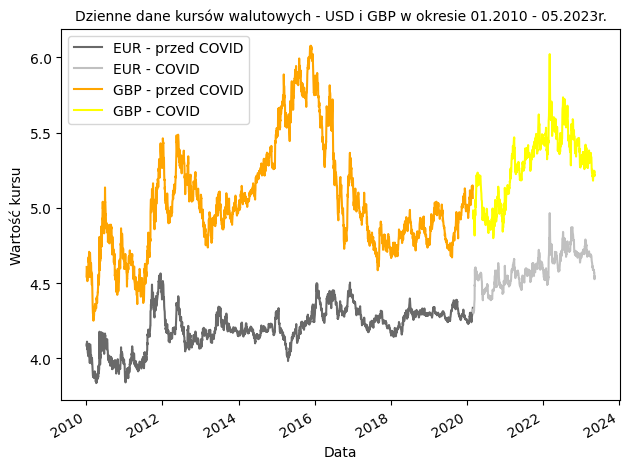

In [70]:
fig, ax = plt.subplots()
WalutyAll['1EUR'][:'2020-02'].plot.line(ax=ax, color = "dimgrey")
WalutyAll['1EUR']['2020-03':].plot.line(ax=ax, color = "silver")
WalutyAll['1GBP'][:'2020-02'].plot.line(ax=ax, color = "orange")
WalutyAll['1GBP']['2020-03':].plot.line(ax=ax, color = "yellow")
plt.title('Dzienne dane kursów walutowych - USD i GBP w okresie 01.2010 - 05.2023r.', fontsize=10)
plt.xlabel('Data')
plt.ylabel('Wartość kursu')
plt.legend(['EUR - przed COVID','EUR - COVID','GBP - przed COVID','GBP - COVID'])
plt.tight_layout()
plt.show()

###### **Wykres euro i hrywny**

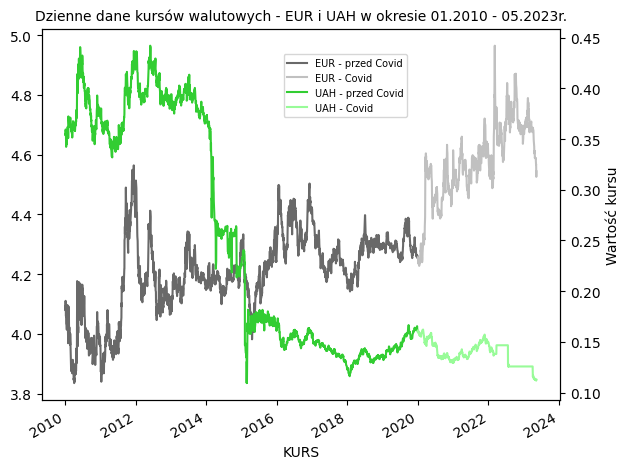

In [71]:
fig, ax = plt.subplots()
WalutyAll['1EUR'][:'2019-12'].plot.line(ax=ax, color = "dimgrey")
WalutyAll['1EUR']['2020-01':].plot.line(ax=ax, color = "silver")
WalutyAll['1UAH'][:'2019-12'].plot.line(ax=ax, color = "limegreen", secondary_y=True)
WalutyAll['1UAH']['2020-01':].plot.line(ax=ax, color = "palegreen", secondary_y=True)
plt.title('Dzienne dane kursów walutowych - EUR i UAH w okresie 01.2010 - 05.2023r.', fontsize=10)
plt.xlabel('Daty')
plt.ylabel('Wartość kursu')
fig.legend(labels=['EUR - przed Covid','EUR - Covid','UAH - przed Covid','UAH - Covid'], fontsize=7, loc=(0.45,0.75))
plt.tight_layout()
plt.show()

#### **Szeregi czasowe** - histogram

###### **Histogram euro**

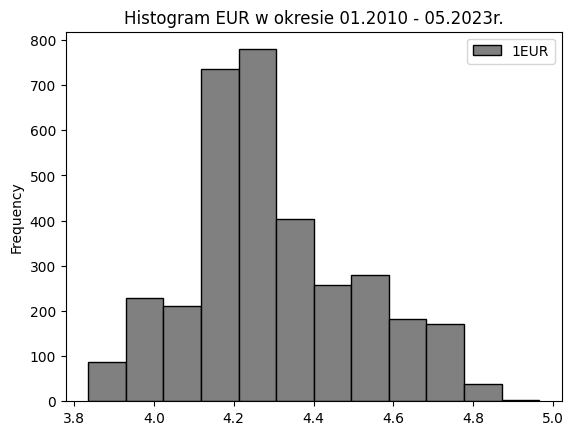

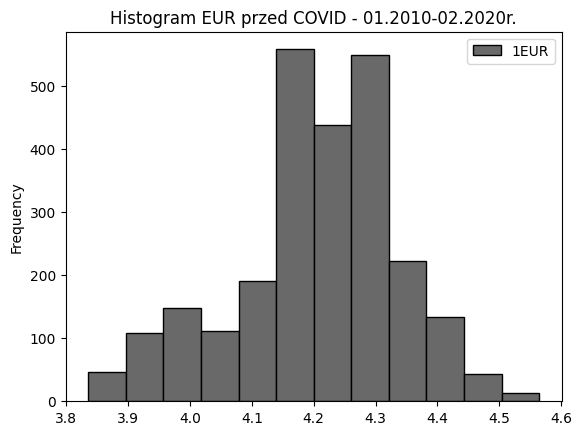

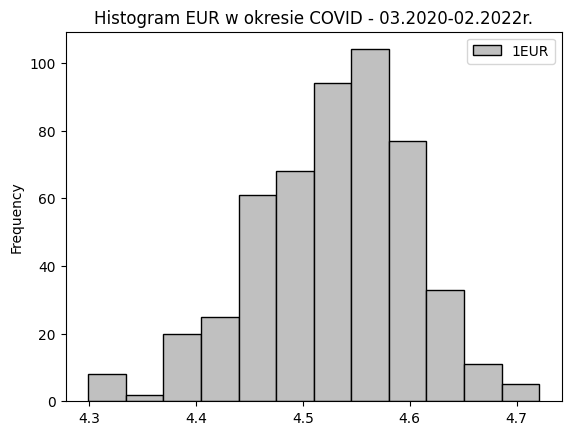

In [72]:
# plot 1 - EUR w okresie styczeń 2010r. - maj 2023r.
WalutyAll['1EUR'].plot.hist(bins=12, edgecolor='black', color= 'grey')
plt.legend()
plt.title('Histogram EUR w okresie 01.2010 - 05.2023r.')
plt.show()

# plot 2 - EUR w okresie przed COVID - styczeń 2010-luty 2020r.
przed_covid_df['1EUR'].plot.hist(bins=12, edgecolor='black', color= 'dimgrey')
plt.legend()
plt.title('Histogram EUR przed COVID - 01.2010-02.2020r.')
plt.show()

# plot 3 - EUR w okresie COVID - marzec 2020-luty 2022r.
covid_df['1EUR'].plot.hist(bins=12, edgecolor='black', color= 'silver')
plt.legend()
plt.title('Histogram EUR w okresie COVID - 03.2020-02.2022r.')
plt.show()

###### **Histogram dolara amerykańskiego**

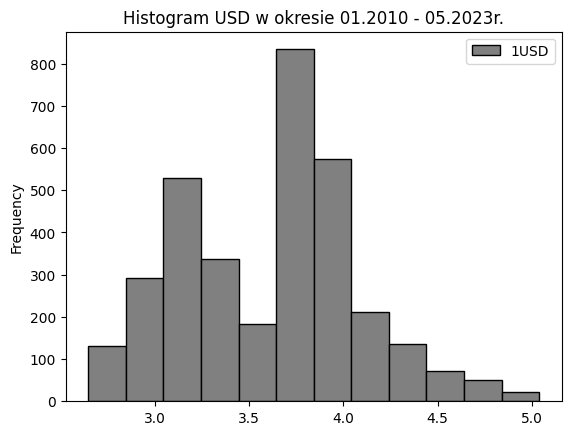

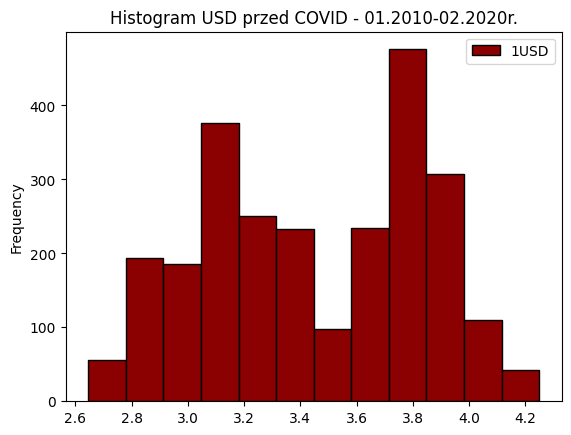

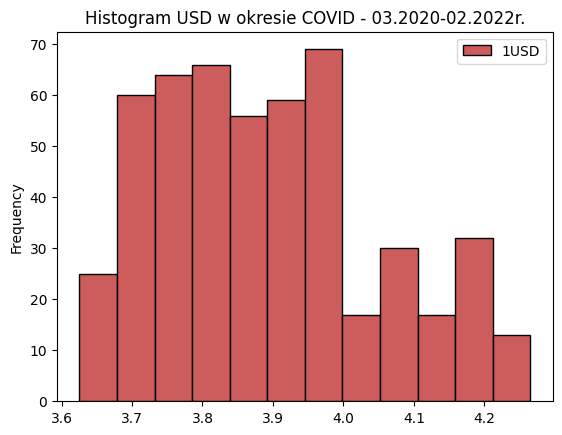

In [73]:
# plot 1 - EUR w okresie styczeń 2010r. - maj 2023r.
WalutyAll['1USD'].plot.hist(bins=12, edgecolor='black', color= 'grey')
plt.legend()
plt.title('Histogram USD w okresie 01.2010 - 05.2023r.')
plt.show()

# plot 2 - EUR w okresie przed COVID - styczeń 2010-luty 2020r.
przed_covid_df['1USD'].plot.hist(bins=12, edgecolor='black', color= 'darkred')
plt.legend()
plt.title('Histogram USD przed COVID - 01.2010-02.2020r.')
plt.show()

# plot 3 - EUR w okresie COVID - marzec 2020-luty 2022r.
covid_df['1USD'].plot.hist(bins=12, edgecolor='black', color= 'indianred')
plt.legend()
plt.title('Histogram USD w okresie COVID - 03.2020-02.2022r.')
plt.show()

###### **Histogram funta**

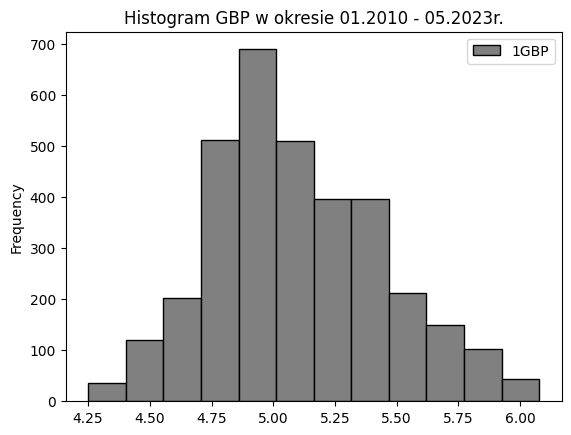

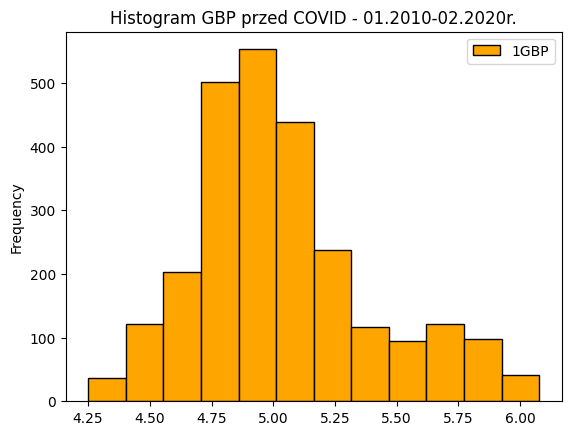

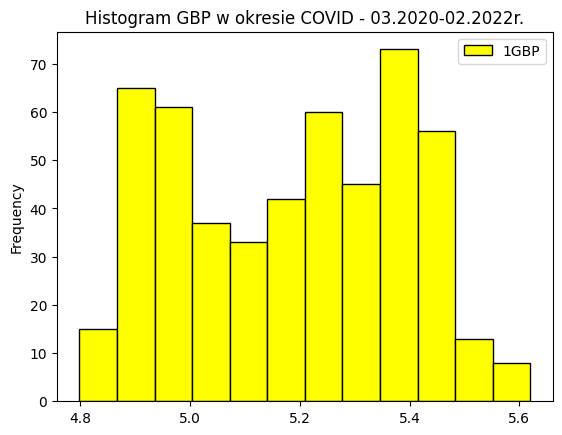

In [74]:
# plot 1 - EUR w okresie styczeń 2010r. - maj 2023r.
WalutyAll['1GBP'].plot.hist(bins=12, edgecolor='black', color= 'grey')
plt.legend()
plt.title('Histogram GBP w okresie 01.2010 - 05.2023r.')
plt.show()

# plot 2 - EUR w okresie przed COVID - styczeń 2010-luty 2020r.
przed_covid_df['1GBP'].plot.hist(bins=12, edgecolor='black', color= 'orange')
plt.legend()
plt.title('Histogram GBP przed COVID - 01.2010-02.2020r.')
plt.show()

# plot 3 - EUR w okresie COVID - marzec 2020-luty 2022r.
covid_df['1GBP'].plot.hist(bins=12, edgecolor='black', color= 'yellow')
plt.legend()
plt.title('Histogram GBP w okresie COVID - 03.2020-02.2022r.')
plt.show()

#### **Szeregi czasowe** - wykresy słupkowe

###### **Okres 01.2010 - 05.2023**

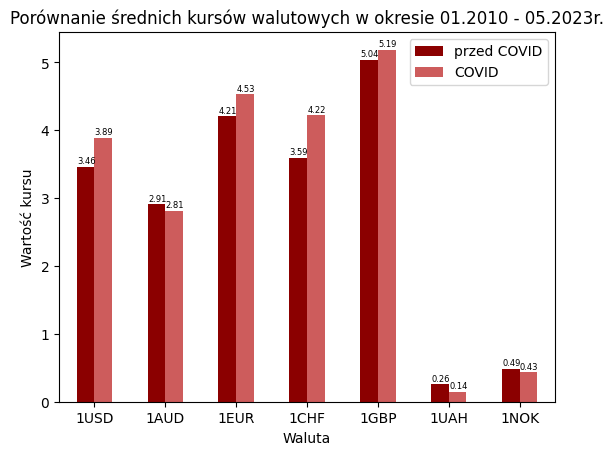

In [75]:
bar_plot_df = pd.DataFrame(index = ['1USD', '1AUD', '1EUR', '1CHF', '1GBP', '1UAH', '1NOK'], columns = ['przed COVID','COVID'])
for waluty in ['1USD', '1AUD', '1EUR', '1CHF', '1GBP', '1UAH', '1NOK']:
  bar_plot_df.loc[waluty,'przed COVID'] = WalutyAll[waluty][:'2020-02'].mean()
  bar_plot_df.loc[waluty,'COVID'] = WalutyAll[waluty]['2020-03':'2022-02'].mean()

ax = bar_plot_df.plot.bar(color=['darkred','indianred'], rot=0)

x_offset = -0.12
y_offset = 0.05
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.2f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset), fontsize = 6) 

   
plt.title('Porównanie średnich kursów walutowych w okresie 01.2010 - 05.2023r.')
plt.xlabel('Waluta')
plt.ylabel('Wartość kursu')

plt.show()


###### **Okres przed COVID - 01.2010 - 02.2020**

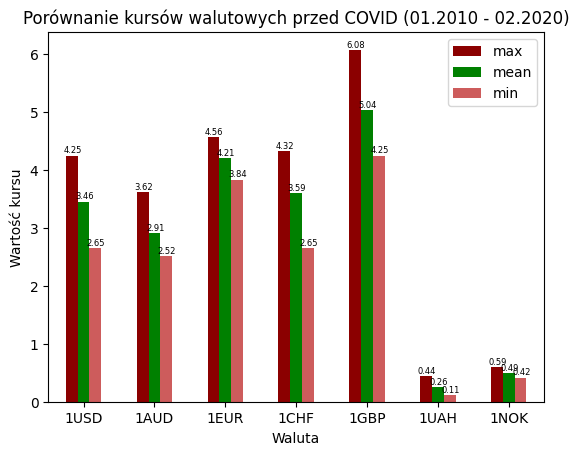

In [76]:
przed_bar_plot_df = pd.DataFrame(index = ['1USD', '1AUD', '1EUR', '1CHF', '1GBP', '1UAH', '1NOK'], columns = ['max', 'mean', 'min'])
for waluty in ['1USD', '1AUD', '1EUR', '1CHF', '1GBP', '1UAH', '1NOK']:
  przed_bar_plot_df.loc[waluty,'max'] = WalutyAll[waluty][:'2020-02'].max()
  przed_bar_plot_df.loc[waluty,'mean'] = WalutyAll[waluty][:'2020-02'].mean()
  przed_bar_plot_df.loc[waluty,'min'] = WalutyAll[waluty][:'2020-02'].min()

ax = przed_bar_plot_df.plot.bar(color=['darkred', 'green','indianred'], rot=0)

x_offset = -0.12
y_offset = 0.05
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.2f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset), fontsize = 6) 

   
plt.title('Porównanie kursów walutowych przed COVID (01.2010 - 02.2020)')
plt.xlabel('Waluta')
plt.ylabel('Wartość kursu')

plt.show()

###### **Czas pandemii COVID - 03.2020 - 02.2022**

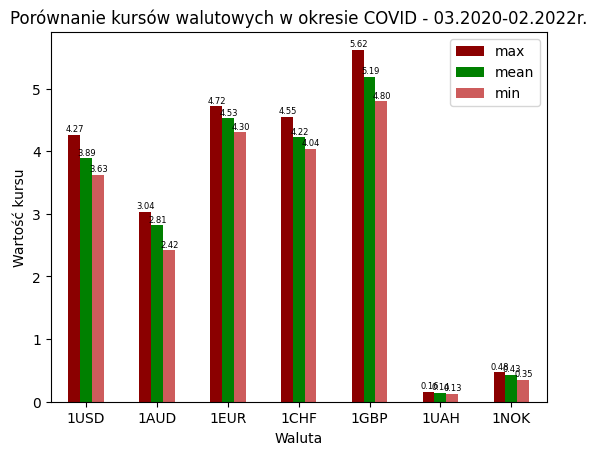

In [77]:
Covid_bar_plot_df = pd.DataFrame(index = ['1USD', '1AUD', '1EUR', '1CHF', '1GBP', '1UAH', '1NOK'], columns = ['max', 'mean', 'min'])
for waluty in ['1USD', '1AUD', '1EUR', '1CHF', '1GBP', '1UAH', '1NOK']:
  Covid_bar_plot_df.loc[waluty,'max'] = WalutyAll[waluty]['2020-03':'2022-02'].max()
  Covid_bar_plot_df.loc[waluty,'mean'] = WalutyAll[waluty]['2020-03':'2022-02'].mean()
  Covid_bar_plot_df.loc[waluty,'min'] = WalutyAll[waluty]['2020-03':'2022-02'].min()

ax = Covid_bar_plot_df.plot.bar(color=['darkred', 'green','indianred'], rot=0)

x_offset = -0.12
y_offset = 0.05
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.2f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset), fontsize = 6) 

   
plt.title('Porównanie kursów walutowych w okresie COVID - 03.2020-02.2022r.')
plt.xlabel('Waluta')
plt.ylabel('Wartość kursu')

plt.show()

#### **Korelacja**

###### **Okres 01.2010 - 05.2023**

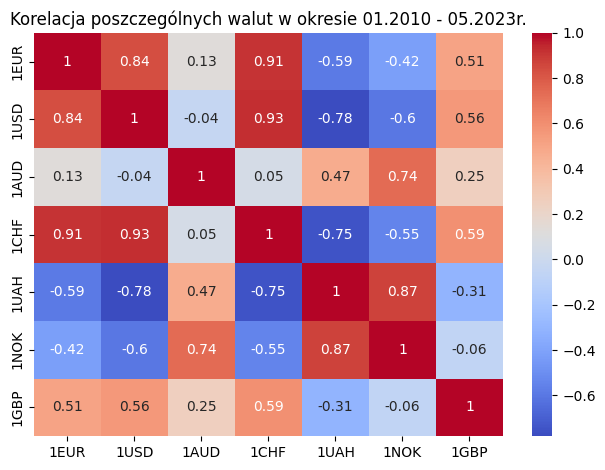

In [78]:
zmienne_kor = ['1EUR', '1USD', '1AUD', '1CHF', '1UAH', '1NOK', '1GBP']
sns.heatmap(KorelAll, cmap='coolwarm', annot = True, xticklabels = zmienne_kor, yticklabels = zmienne_kor)
plt.title("Korelacja poszczególnych walut w okresie 01.2010 - 05.2023r.")
plt.tight_layout()
plt.show()

###### **Okres przed COVID - 01.2010 - 02.2020**

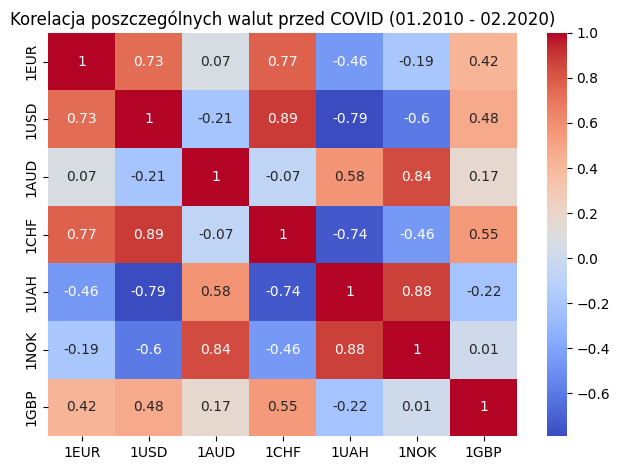

In [79]:
sns.heatmap(KorelPrzedCOV, cmap='coolwarm', annot = True, xticklabels = zmienne_kor, yticklabels = zmienne_kor)
plt.title("Korelacja poszczególnych walut przed COVID (01.2010 - 02.2020)")
plt.tight_layout()
plt.show()

###### **Czas pandemii COVID - 03.2020 - 02.2022**

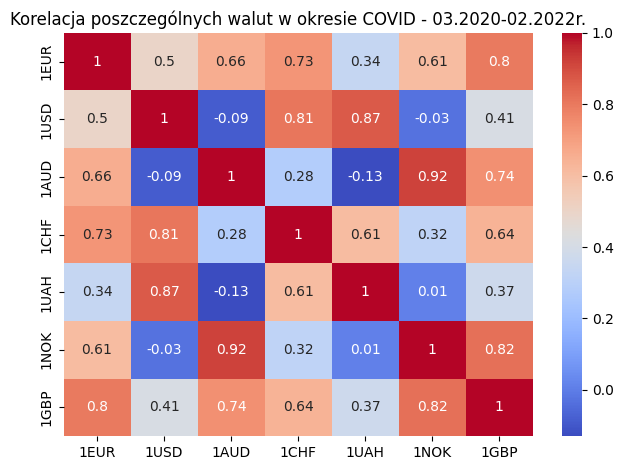

In [80]:
sns.heatmap(KorelCOV, cmap='coolwarm', annot = True, xticklabels = zmienne_kor, yticklabels = zmienne_kor)
plt.title("Korelacja poszczególnych walut w okresie COVID - 03.2020-02.2022r.")
plt.tight_layout()
plt.show()

### **Podsumowanie analizy**

Średnia wartość kursów walutowych z czasu sprzed pandemii (01.2010-02.2022) kształtowała się na poziomie.

In [81]:
mean_przed_covid = przed_covid_df[['1USD', '1AUD', '1EUR', '1CHF', '1GBP', '1UAH', '1NOK']].mean().round(4)
mean_przed_covid

1USD    3.4565
1AUD    2.9085
1EUR    4.2054
1CHF    3.5948
1GBP    5.0388
1UAH    0.2550
1NOK    0.4891
dtype: float64

Średnia wartość kursów walutowych z czasu  pandemii (03.2020-02.2022) kształtowała się na poziomie.

In [82]:
mean_covid = covid_df[['1USD', '1AUD', '1EUR', '1CHF', '1GBP', '1UAH', '1NOK']].mean().round(4)
mean_covid

1USD    3.8924
1AUD    2.8142
1EUR    4.5289
1CHF    4.2197
1GBP    5.1872
1UAH    0.1420
1NOK    0.4342
dtype: float64

Różnica kursów walutowych - czas pandemii - czas przed pandemią.  

In [83]:
mean_roznica = (mean_covid - mean_przed_covid).round(2)
mean_roznica

1USD    0.44
1AUD   -0.09
1EUR    0.32
1CHF    0.62
1GBP    0.15
1UAH   -0.11
1NOK   -0.05
dtype: float64

O ile wzrosły lub zmalały kursy - czas pandemii do czasu sprzed pandemii.

In [84]:
mean_devide = ((mean_covid / mean_przed_covid)-1).round(2)
mean_devide

1USD    0.13
1AUD   -0.03
1EUR    0.08
1CHF    0.17
1GBP    0.03
1UAH   -0.44
1NOK   -0.11
dtype: float64

Największy wzrost odnotowano, bo aż o 17% w przypadku franka szajcarskiego, tj 0.62 zł. Dolar amerykański był wyższy o 13%, tj. 0.44 zł., w okresie COVID niż przed tym czasem. Euro średnio było większe o 8% (0.32 zł.) w czasie objętym kwarantanną. W tym samym czasie hrywna była mniejsza o 44% w czasie pandemii, tj. 0.11 zł, korona norweska o 11%, co stanowi 5 groszy mniej w stosunku do czasu sprzed COVID.